<a href="https://colab.research.google.com/github/HChandeepa/Sri_Lanka_Food_Prices_Analysis/blob/Master/Sri_Lanka_Food_Prices_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive, files
# drive.mount('/content/drive')

## Load the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
# import dataset.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/wfp_food_prices_lka.csv')

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Load Time: {pandas_load_time:.4f} seconds")

Pandas Load Time: 0.0001 seconds


In [5]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       18506 non-null  object 
 1   admin1     18377 non-null  object 
 2   admin2     18377 non-null  object 
 3   market     18506 non-null  object 
 4   latitude   18377 non-null  float64
 5   longitude  18377 non-null  float64
 6   category   18506 non-null  object 
 7   commodity  18506 non-null  object 
 8   unit       18506 non-null  object 
 9   priceflag  18506 non-null  object 
 10  pricetype  18506 non-null  object 
 11  currency   18506 non-null  object 
 12  price      18506 non-null  float64
 13  usdprice   18506 non-null  float64
dtypes: float64(4), object(10)
memory usage: 2.0+ MB


In [6]:
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [7]:
df.describe()

,latitude,longitude,price,usdprice
count,18377.000000,18377.000000,18506.000000,18506.000000
mean,7.481010,80.568017,581.991651,1.953836
std,0.947683,0.533244,606.396366,1.920414
min,5.952000,79.831700,11.500000,0.060200
25%,6.906044,80.045803,150.000000,0.655825
50%,7.253400,80.515701,320.120000,1.043450
75%,8.038129,81.005890,883.207500,2.930650
max,9.656700,81.700000,3735.420000,11.945700


In [8]:
selected_columns = ['admin1','admin2','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in admin1: ['Western' 'Eastern' 'Northern' nan 'Central' 'North Central'
 'North Western' 'Sabaragamuwa' 'Southern' 'Uva']


Unique values in admin2: ['Colombo' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mullattivu' 'Vavuniya' nan 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam' 'Ratnapura' 'Galle'
 'Hambantota' 'Matara' 'Badulla' 'Moneragala' 'Gampaha' 'Kalutara'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Batticaloa' 'Trincomalee' 'Jaffna' 'Kilinochchi'
 'Mannar' 'Mulaitivu' 'Vavuniya' 'National Average' 'Kandy' 'Matale'
 'Nuwara Eliya' 'Anuradhapura' 'Polonnaruwa' 'Kurunegala' 'Puttalam'
 'Rathnapura' 'Galle' 'Hambantota' 'Matara' 'Badulla' 'Monaragala'
 'Gampaha' 'Kalutara' 'Kegalle' 'Economic Centre-Dambulla'
 'Economic Centre-Pettah' 'Economic Centre-Maradagahamula'
 'Fish market-Negombo' 'Fish market-Peliyagoda'
 'Economic Centre - Peliyagoda' 'Hanguranketha' 'Dehiattakandiya'
 'Ga

In [9]:
df.rename(columns={'admin1': 'province', 'admin2': 'district'}, inplace=True)

In [10]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,1/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.66,0.2725
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
2,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.71,0.2718
3,3/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Wheat flour,KG,actual,Retail,LKR,26.63,0.2738
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376


In [11]:
# Filter the dataset to keep only rice-related commodities and retail price type
df = df[df['commodity'].str.contains("Rice", case=False, na=False) & (df['pricetype'] == 'Retail')]

# Print the number of rows after filtering
print(f"Rows after filtering for rice retail data: {df.shape[0]}")

# Show the first few rows of the filtered data
df.head()

Rows after filtering for rice retail data: 2025


,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
4,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376
6,5/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455
8,6/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341
11,8/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368


In [12]:
df.shape

(2025, 14)

In [13]:
df.dtypes

,0
date,object
province,object
district,object
market,object
latitude,float64
longitude,float64
category,object
commodity,object
unit,object
priceflag,object


In [14]:
df[['price']].min()

,0
price,22.0


In [15]:
df[['price']].max()

,0
price,282.5


In [16]:
df[['usdprice']].min()

,0
usdprice,0.1965


In [17]:
df[['usdprice']].max()

,0
usdprice,1.6844


## Data Cleaning

In [18]:
# Check for missing values
print(df.isnull().sum())

date          0
province     51
district     51
market        0
latitude     51
longitude    51
category      0
commodity     0
unit          0
priceflag     0
pricetype     0
currency      0
price         0
usdprice      0
dtype: int64


In [19]:
df.dropna(subset=['province', 'district', 'latitude', 'longitude'], inplace=True)

start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Clean Time: {pandas_load_time:.4f} seconds")

Pandas Clean Time: 0.0000 seconds


In [20]:
print(df.isnull().sum())

date         0
province     0
district     0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64


### Date Formatting

In [21]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')


start_time = time.time()
end_time = time.time()
pandas_load_time = end_time - start_time
print(f"Pandas Convert 'date' column to datetime format Time: {pandas_load_time:.4f} seconds")

Pandas Convert 'date' column to datetime format Time: 0.0000 seconds


### Handling Duplicates

In [22]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [23]:
selected_columns = ['province','district','market','category','commodity','unit','pricetype']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

In [24]:
df.shape

(1974, 14)

In [25]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376
6,2004-05-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455
8,2004-06-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341
11,2004-08-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368


In [26]:
df.shape

(1974, 14)

## Feature Engineering

In [27]:
# Feature Engineering
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [28]:
df.head()

,date,province,district,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,year,month
1,2004-02-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.62,0.3421,2004,2
4,2004-04-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,32.98,0.3376,2004,4
6,2004-05-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.10,0.3455,2004,5
8,2004-06-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,33.74,0.3341,2004,6
11,2004-08-15,Western,Colombo,Colombo City,6.931944,79.847778,cereals and tubers,Rice (red nadu),KG,actual,Retail,LKR,34.78,0.3368,2004,8


In [29]:
selected_columns = ['province','district','market','category','commodity','unit','pricetype','priceflag','currency']
for columns in selected_columns:
  unique_values = df[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

In [30]:
# # Save the cleaned data
# df.to_csv("cleaned_data.csv", index=False)

## Predictive Analytics  

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/cleaned_data.csv')
df2.head()

,date,province,district,market,latitude,longitude,commodity,price,usdprice,year,month
0,2/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),33.62,0.3421,2004,2
1,4/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),32.98,0.3376,2004,4
2,5/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),34.10,0.3455,2004,5
3,6/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),33.74,0.3341,2004,6
4,8/15/2004,Western,Colombo,Colombo City,6.931944,79.847778,Rice (red nadu),34.78,0.3368,2004,8


In [32]:
df2.describe()

,latitude,longitude,price,usdprice,year,month
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,7.630079,80.541678,143.436733,0.623366,2017.851064,6.930598
std,1.012619,0.568340,84.485909,0.156488,6.109004,3.341175
min,5.952000,79.838146,22.000000,0.196500,2004.000000,1.000000
25%,6.931944,79.977203,67.080000,0.513125,2015.000000,4.000000
50%,7.294600,80.500000,95.910000,0.630750,2017.000000,7.000000
75%,8.566667,81.005890,230.000000,0.731875,2024.000000,10.000000
max,9.656700,81.700000,282.500000,1.684400,2024.000000,12.000000


In [33]:
df2.dtypes

,0
date,object
province,object
district,object
market,object
latitude,float64
longitude,float64
commodity,object
price,float64
usdprice,float64
year,int64


In [34]:
df2.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'commodity', 'price', 'usdprice', 'year', 'month'],
      dtype='object')

### Unique Values of the columns

In [35]:
selected_columns = ['province','district','market','commodity']
for columns in selected_columns:
  unique_values = df2[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: ['Western' 'Eastern' 'Northern' 'Central' 'North Central' 'North Western'
 'Southern' 'Uva' 'Sabaragamuwa']


Unique values in district: ['Colombo' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mullattivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Moneragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Ratnapura' 'Kurunegala'
 'Kegalle']


Unique values in market: ['Colombo City' 'Ampara' 'Jaffna' 'Kilinochchi' 'Mannar' 'Vavuniya'
 'Trincomalee' 'Batticaloa' 'Mulaitivu' 'Kandy' 'Matale' 'Nuwara Eliya'
 'Anuradhapura' 'Puttalam' 'Galle' 'Matara' 'Monaragala' 'Gampaha'
 'Polonnaruwa' 'Hambantota' 'Badulla' 'Kalutara' 'Rathnapura' 'Kurunegala'
 'Kegalle' 'Economic Centre-Pettah' 'Hanguranketha' 'Dehiattakandiya'
 'Galenbindunuwewa' 'Thambuttegama' 'Nikaweratiya' 'Mullativu'
 'Embilipitiya' 'Keppetipola (DEC}' 'Dammbagalla' 'Meegoda(DEC)'
 'Tissamaharama' 'Bandarawela']


Unique

### Encoding Using Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['province', 'district', 'market']

# Apply LabelEncoder to each column
for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

df2.head()

,date,province,district,market,latitude,longitude,commodity,price,usdprice,year,month
0,2/15/2004,8,4,5,6.931944,79.847778,Rice (red nadu),33.62,0.3421,2004,2
1,4/15/2004,8,4,5,6.931944,79.847778,Rice (red nadu),32.98,0.3376,2004,4
2,5/15/2004,8,4,5,6.931944,79.847778,Rice (red nadu),34.10,0.3455,2004,5
3,6/15/2004,8,4,5,6.931944,79.847778,Rice (red nadu),33.74,0.3341,2004,6
4,8/15/2004,8,4,5,6.931944,79.847778,Rice (red nadu),34.78,0.3368,2004,8


In [37]:
df2 = pd.get_dummies(df2, columns=['commodity'], drop_first=True)

In [38]:
df2.head()

,date,province,district,market,latitude,longitude,price,usdprice,year,month,commodity_Rice (medium grain),commodity_Rice (red nadu),commodity_Rice (red),commodity_Rice (white)
0,2/15/2004,8,4,5,6.931944,79.847778,33.62,0.3421,2004,2,False,True,False,False
1,4/15/2004,8,4,5,6.931944,79.847778,32.98,0.3376,2004,4,False,True,False,False
2,5/15/2004,8,4,5,6.931944,79.847778,34.10,0.3455,2004,5,False,True,False,False
3,6/15/2004,8,4,5,6.931944,79.847778,33.74,0.3341,2004,6,False,True,False,False
4,8/15/2004,8,4,5,6.931944,79.847778,34.78,0.3368,2004,8,False,True,False,False


In [39]:
df2.columns

Index(['date', 'province', 'district', 'market', 'latitude', 'longitude',
       'price', 'usdprice', 'year', 'month', 'commodity_Rice (medium grain)',
       'commodity_Rice (red nadu)', 'commodity_Rice (red)',
       'commodity_Rice (white)'],
      dtype='object')

### Unique Values of the columns

In [40]:
selected_columns = ['province','district','market','commodity_Rice (medium grain)','commodity_Rice (red nadu)','commodity_Rice (red)','commodity_Rice (white)']
for columns in selected_columns:
  unique_values = df2[columns].unique()
  print(f"Unique values in {columns}: {unique_values}\n\n")

Unique values in province: [8 1 4 0 2 3 6 7 5]


Unique values in district: [ 4  0  8 12 14 24 23  3 18 10 15 19  1 21  5 16 17  6 20  7  2  9 22 13
 11]


Unique values in market: [ 5  0 15 20 22 37 36  4 27 17 23 30  1 32 11 24 26 12 31 13  2 16 33 21
 18  8 14  7 10 34 29 28  9 19  6 25 35  3]


Unique values in commodity_Rice (medium grain): [False  True]


Unique values in commodity_Rice (red nadu): [ True False]


Unique values in commodity_Rice (red): [False  True]


Unique values in commodity_Rice (white): [False  True]




### Year Transformation

In [41]:
# Convert 'date' column to datetime
df2['date'] = pd.to_datetime(df2['date'], errors='coerce')

### Heat map to identify correlation coefficient

price                            1.000000
date                             0.909136
year                             0.908992
usdprice                         0.876553
commodity_Rice (white)           0.514044
commodity_Rice (medium grain)    0.451338
month                            0.145732
longitude                        0.094124
market                           0.061320
district                         0.010982
commodity_Rice (red)            -0.035529
province                        -0.067455
latitude                        -0.232992
commodity_Rice (red nadu)       -0.535532
Name: price, dtype: float64


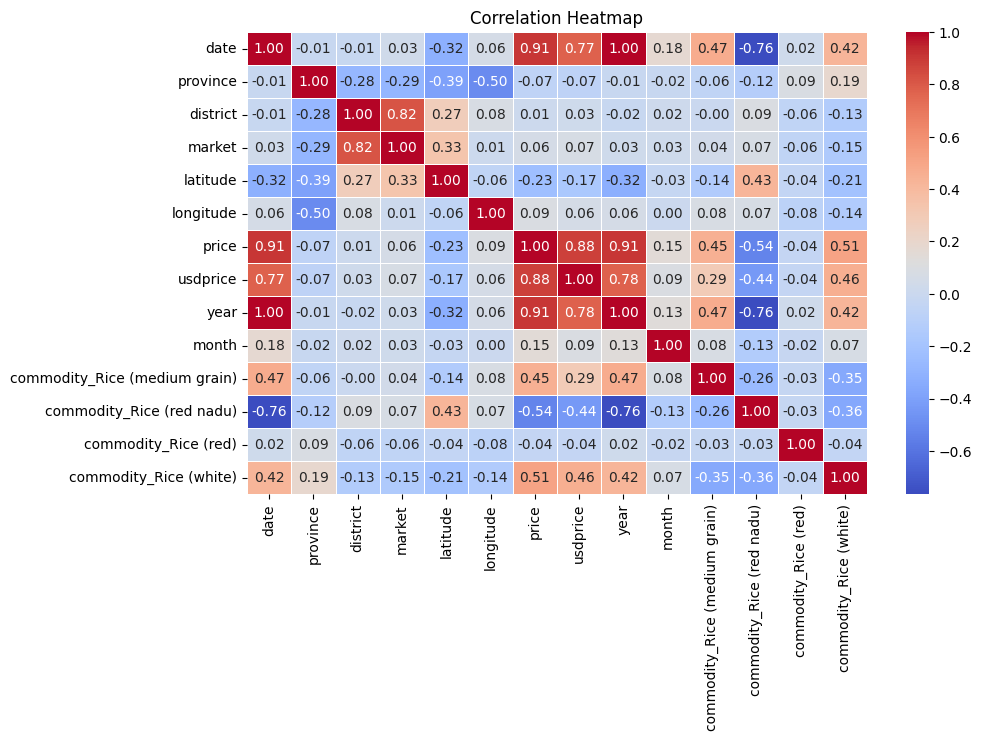

In [42]:
correlation_matrix = df2.corr()
print(correlation_matrix["price"].sort_values(ascending=False))
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Define Features & Target Variable

In [43]:
# Ensure 'date' is in proper datetime format
df2['date'] = pd.to_datetime(df2['date'], format='%d/%m/%Y %H:%M')

# Extract numerical features from the 'date' column
df2['year'] = df2['date'].dt.year
df2['month'] = df2['date'].dt.month
df2['day'] = df2['date'].dt.day  # Add day if needed

# Define your selected predictor variables, EXCLUDING 'date' and including new features
selected_features = [
    'year',
    'month',
    'day',
    'commodity_Rice (white)',
    'commodity_Rice (medium grain)',
    'commodity_Rice (red)',
    'commodity_Rice (red nadu)',
    'district',
    'market'
]

In [44]:
# Create a new dataframe with the selected features and the target 'price'
X = df2[selected_features]  # Features (predictors)
y = df2['price']  # Target variable

# Split the data into training and test sets (80:20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train and Evaluate the Model

#### Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Take the square root of MSE
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Linear Regression R²: {r2_lr:.2f}")

Linear Regression RMSE: 20.39
Linear Regression MAE: 13.84
Linear Regression R²: 0.94


#### Random Forest Regression

In [46]:
from sklearn.ensemble import RandomForestRegressor


# Train a Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Take the square root of MSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")


Random Forest RMSE: 4.88
Random Forest MAE: 3.26
Random Forest R²: 1.00


#### Decision Tree Regression

In [47]:
from sklearn.tree import DecisionTreeRegressor


# Train a Decision Tree model
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)  # Take the square root of MSE
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Decision Tree R²: {r2_dt:.2f}")

Decision Tree RMSE: 7.69
Decision Tree MAE: 4.23
Decision Tree R²: 0.99


#### XGBoost (Extreme Gradient Boosting)

In [48]:
from xgboost import XGBRegressor

# Train an XGBoost model
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # Take the square root of MSE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

XGBoost RMSE: 4.42
XGBoost MAE: 3.20
XGBoost R²: 1.00


In [49]:
# Example: Assuming you used LabelEncoder()
from sklearn.preprocessing import LabelEncoder

# Re-create LabelEncoders (use the same encoders from training)
province_encoder = LabelEncoder()
district_encoder = LabelEncoder()
market_encoder = LabelEncoder()

# Fit on original text data
province_encoder.fit(['Western', 'Eastern', 'Northern', 'Central', 'North Central',
                      'North Western', 'Southern', 'Uva', 'Sabaragamuwa'])

district_encoder.fit(['Colombo', 'Ampara', 'Jaffna', 'Kilinochchi', 'Mannar', 'Vavuniya',
                      'Trincomalee', 'Batticaloa', 'Mullattivu', 'Kandy', 'Matale', 'Nuwara Eliya',
                      'Anuradhapura', 'Puttalam', 'Galle', 'Matara', 'Moneragala', 'Gampaha',
                      'Polonnaruwa', 'Hambantota', 'Badulla', 'Kalutara', 'Ratnapura', 'Kurunegala',
                      'Kegalle'])

market_encoder.fit(['Colombo City', 'Ampara', 'Jaffna', 'Kilinochchi', 'Mannar', 'Vavuniya',
                    'Trincomalee', 'Batticaloa', 'Mulaitivu', 'Kandy', 'Matale', 'Nuwara Eliya',
                    'Anuradhapura', 'Puttalam', 'Galle', 'Matara', 'Monaragala', 'Gampaha',
                    'Polonnaruwa', 'Hambantota', 'Badulla', 'Kalutara', 'Rathnapura', 'Kurunegala',
                    'Kegalle', 'Economic Centre-Pettah', 'Hanguranketha', 'Dehiattakandiya',
                    'Galenbindunuwewa', 'Thambuttegama', 'Nikaweratiya', 'Mullativu',
                    'Embilipitiya', 'Keppetipola (DEC}', 'Dammbagalla', 'Meegoda(DEC)',
                    'Tissamaharama', 'Bandarawela'])

# Get the reverse mapping
province_mapping = dict(zip(province_encoder.transform(province_encoder.classes_), province_encoder.classes_))
district_mapping = dict(zip(district_encoder.transform(district_encoder.classes_), district_encoder.classes_))
market_mapping = dict(zip(market_encoder.transform(market_encoder.classes_), market_encoder.classes_))

# Print mappings
print("Province Mapping:")
print(province_mapping)

print("\nDistrict Mapping:")
print(district_mapping)

print("\nMarket Mapping:")
print(market_mapping)

Province Mapping:
{np.int64(0): np.str_('Central'), np.int64(1): np.str_('Eastern'), np.int64(2): np.str_('North Central'), np.int64(3): np.str_('North Western'), np.int64(4): np.str_('Northern'), np.int64(5): np.str_('Sabaragamuwa'), np.int64(6): np.str_('Southern'), np.int64(7): np.str_('Uva'), np.int64(8): np.str_('Western')}

District Mapping:
{np.int64(0): np.str_('Ampara'), np.int64(1): np.str_('Anuradhapura'), np.int64(2): np.str_('Badulla'), np.int64(3): np.str_('Batticaloa'), np.int64(4): np.str_('Colombo'), np.int64(5): np.str_('Galle'), np.int64(6): np.str_('Gampaha'), np.int64(7): np.str_('Hambantota'), np.int64(8): np.str_('Jaffna'), np.int64(9): np.str_('Kalutara'), np.int64(10): np.str_('Kandy'), np.int64(11): np.str_('Kegalle'), np.int64(12): np.str_('Kilinochchi'), np.int64(13): np.str_('Kurunegala'), np.int64(14): np.str_('Mannar'), np.int64(15): np.str_('Matale'), np.int64(16): np.str_('Matara'), np.int64(17): np.str_('Moneragala'), np.int64(18): np.str_('Mullattivu'

In [50]:
df2.tail(10)

,date,province,district,market,latitude,longitude,price,usdprice,year,month,commodity_Rice (medium grain),commodity_Rice (red nadu),commodity_Rice (red),commodity_Rice (white),day
1964,2024-12-15,7,2,3,6.829952,80.991452,245.56,0.8203,2024,12,True,False,False,False,15
1965,2024-12-15,7,2,3,6.829952,80.991452,241.67,0.8073,2024,12,False,False,False,True,15
1966,2024-12-15,7,2,19,6.906044,80.911078,253.25,0.8460,2024,12,True,False,False,False,15
1967,2024-12-15,7,17,6,6.979858,81.374670,244.00,0.8151,2024,12,False,False,False,True,15
1968,2024-12-15,7,17,26,6.874690,81.231730,230.00,0.7683,2024,12,True,False,False,False,15
1969,2024-12-15,7,17,26,6.874690,81.231730,244.00,0.8151,2024,12,False,False,False,True,15
1970,2024-12-15,8,4,5,6.931944,79.847778,252.15,0.8423,2024,12,False,False,False,True,15
1971,2024-12-15,8,4,25,6.843806,80.045803,242.00,0.8084,2024,12,True,False,False,False,15
1972,2024-12-15,8,6,12,7.081500,79.977203,236.50,0.7900,2024,12,True,False,False,False,15
1973,2024-12-15,8,9,16,6.587400,79.959198,247.16,0.8256,2024,12,False,False,False,True,15


In [51]:
df2.head(10)

,date,province,district,market,latitude,longitude,price,usdprice,year,month,commodity_Rice (medium grain),commodity_Rice (red nadu),commodity_Rice (red),commodity_Rice (white),day
0,2004-02-15,8,4,5,6.931944,79.847778,33.62,0.3421,2004,2,False,True,False,False,15
1,2004-04-15,8,4,5,6.931944,79.847778,32.98,0.3376,2004,4,False,True,False,False,15
2,2004-05-15,8,4,5,6.931944,79.847778,34.10,0.3455,2004,5,False,True,False,False,15
3,2004-06-15,8,4,5,6.931944,79.847778,33.74,0.3341,2004,6,False,True,False,False,15
4,2004-08-15,8,4,5,6.931944,79.847778,34.78,0.3368,2004,8,False,True,False,False,15
5,2004-09-15,8,4,5,6.931944,79.847778,37.14,0.3599,2004,9,False,True,False,False,15
6,2004-10-15,8,4,5,6.931944,79.847778,37.36,0.3596,2004,10,False,True,False,False,15
7,2004-11-15,1,0,0,7.283333,81.666667,41.75,0.3983,2004,11,False,True,False,False,15
8,2004-11-15,4,8,15,9.656700,80.013700,113.75,1.0853,2004,11,False,True,False,False,15
9,2004-11-15,4,12,20,9.396100,80.398200,32.00,0.3053,2004,11,False,True,False,False,15


### Check Models

In [52]:
import pandas as pd

# Example new data (ensure it matches the training feature set)
new_data = pd.DataFrame({
    'year': [2024],
    'month': [12],
    'day': [15],
    'commodity_Rice (white)': [0],
    'commodity_Rice (medium grain)': [1],
    'commodity_Rice (red)': [0],
    'commodity_Rice (red nadu)': [0],
    'district': [6],
    'market': [12]
})

# Ensure the input format is consistent with training data
predicted_price = model_xgb.predict(new_data)

print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 236.00


In [53]:
import pandas as pd

# Example new data (ensure it matches the training feature set)
new_data = pd.DataFrame({
    'year': [2024],
    'month': [12],
    'day': [15],
    'commodity_Rice (white)': [1],
    'commodity_Rice (medium grain)': [0],
    'commodity_Rice (red)': [0],
    'commodity_Rice (red nadu)': [0],
    'district': [9],
    'market': [16]
})

# Ensure the input format is consistent with training data
predicted_price = model_xgb.predict(new_data)

print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 246.08


In [54]:
import pandas as pd

# Example new data (ensure it matches the training feature set)
new_data = pd.DataFrame({
    'year': [2004],
    'month': [2],
    'day': [15],
    'commodity_Rice (white)': [0],
    'commodity_Rice (medium grain)': [0],
    'commodity_Rice (red)': [0],
    'commodity_Rice (red nadu)': [1],
    'district': [4],
    'market': [5]
})

# Ensure the input format is consistent with training data
predicted_price = model_xgb.predict(new_data)

print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 34.30


In [55]:
import pandas as pd

# Example new data (ensure it matches the training feature set)
new_data = pd.DataFrame({
    'year': [2025],
    'month': [4],
    'day': [10],
    'commodity_Rice (white)': [1],
    'commodity_Rice (medium grain)': [0],
    'commodity_Rice (red)': [0],
    'commodity_Rice (red nadu)': [0],
    'district': [2],
    'market': [2]
})

# Ensure the input format is consistent with training data
predicted_price = model_xgb.predict(new_data)

print(f"Predicted Price: {predicted_price[0]:.2f}")

Predicted Price: 265.92
